# **HEART DISESASE PREDICTION MODEL**

This project will help us to predict whether a person is suffering from any kind of heart disease or not.
For the resource of the CSV file we used the dataset from the `kaggle.com`

## Importing the libraries

first we began our machine learning project we need to import some important libraries that we will need for our model prediction
we will use 'pandas' to import the CSV file, and `numpy` for mathematical calculations, `matplotlib` for graphing the models and `sklearn` for importing the models that we will need for prediction

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Importing some tools

we need to split the dataset into target and test rows, for that we will import the `train_test_split` from `sklearn.model_selction`

Also we will need to scale our variables in the dataset, in order to achieve that we will use `StandardScaler` from the `sklearn.preprocessing`.

We will also import `accuracy_scores` and `confusion_matrix` to show the accuracy of the model and confusion matrix for each model

`Counter` is needed to be imported to check the number of different values in a datafield

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from collections import Counter

# Machie Leanring Models
Next, We'll import all the Machine Learning algorithms We will be implementing.
1. K Neighbors Classifier
2. Support Vector Classifier
3. Decision Tree Classifier
4. Random Forest Classifier
5. Logistic Regression
6. Naive Bayes

In [52]:
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier as DTC

## Import dataset

Now after finishing our importing or all libraries, we will import the dataset using the panda's `read_csv` function to read or dataset that is stored in csv file

In [53]:
dataset = pd.read_csv("dataset.csv")

print the top five rows of the dataset

In [54]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


#### PRINTING THE INFORMATION
Now printing about the datatyes of each column of the dataset

In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1000 non-null   int64  
 1   sex       1000 non-null   int64  
 2   cp        1000 non-null   int64  
 3   trestbps  1000 non-null   int64  
 4   chol      1000 non-null   int64  
 5   fbs       1000 non-null   int64  
 6   restecg   1000 non-null   int64  
 7   thalach   1000 non-null   int64  
 8   exang     1000 non-null   int64  
 9   oldpeak   1000 non-null   float64
 10  slope     1000 non-null   int64  
 11  ca        1000 non-null   int64  
 12  thal      1000 non-null   int64  
 13  target    1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


The dataset has total of 13 features from which one `target` value that we will be predicting with our machine learning algorithm

the units of dataset columns is in either `float` or `int` which makes preprocessing tasks like `scaling` much easier

In [56]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,54.489000,0.692000,0.950000,131.781000,246.185000,0.15000,0.528000,149.089000,0.337000,1.072200,1.384000,0.753000,2.323000,0.515000
std,9.101248,0.461898,1.029835,17.574638,51.710916,0.35725,0.524873,23.027969,0.472921,1.176321,0.617191,1.031045,0.620529,0.500025
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.00000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.00000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.00000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.00000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.00000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


although the Unit of the features might be same the range in which they are distributed is totally different from each other in many of the columns.

## Understanding the data

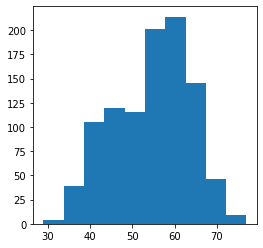

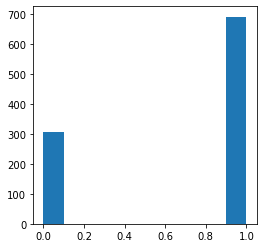

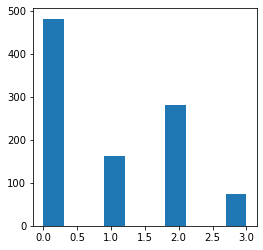

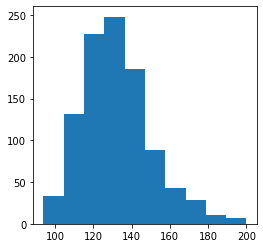

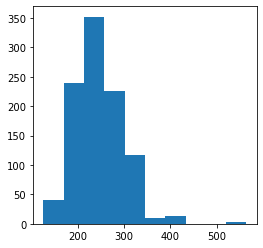

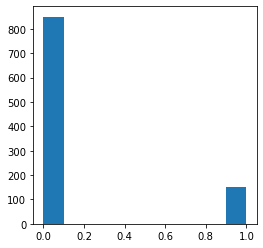

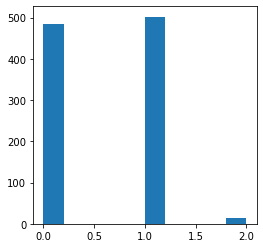

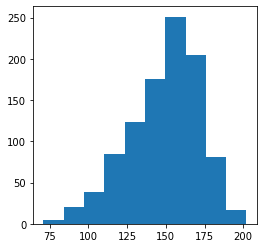

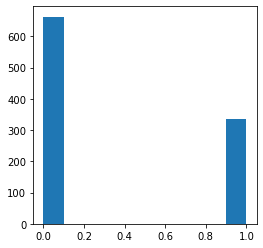

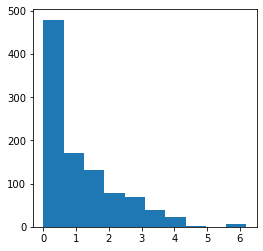

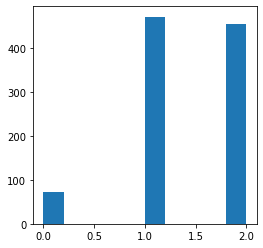

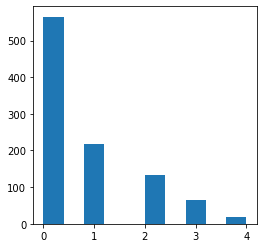

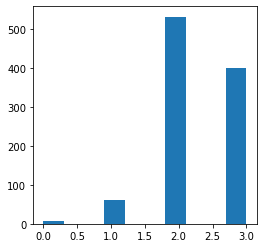

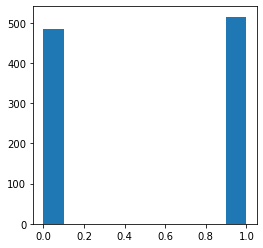

In [57]:
for x in dataset:
    plt.figure(figsize=(4,4))
    plt.hist(dataset[x])
    plt.show()


Above histogram is indicating that the values of each columens are distributed in different types of ranges thus applying the scaling would be a good option to make dataset more suitable for gradient based algorithms

Before we apply the algorithm we must check whether or not the target values are equally distributed or not

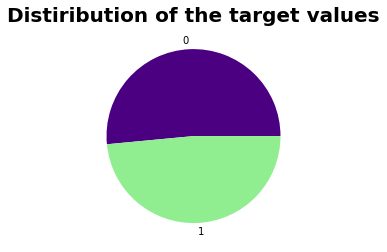

In [58]:
x1 = x0 = 0
for i in dataset['target']:
    if i == 0: x0 = x0 + 1
    if i == 1: x1 = x1 + 1

plt.pie([x1, x0], colors=["indigo", "lightgreen"], labels=[0, 1])
plt.title("Distiribution of the target values", fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.show()

the two classes of target values `1` and `0` or almost equally distributed which is good enough ratio for our model training

# Preparing the model

In [59]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

## Data Processing

Now applying standard scaling on the dataset integer and float values for the machine learning algorithms that depends on gradient based algorithm, like K neighbors algorithms
We will apply `StandardScaler`

In [60]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

# Machine Learning 

## Support Vector Classifier

There are several kernels for Support Vector Classifier. I'll test some of them and check which has the best score.

In [61]:
svc_scores = []
#we will be using 4 different kernals for our Support Vector Classifier Algotrithm
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in kernels:
    SVC_model = SVC(kernel = i)
    SVC_model.fit(X_train, y_train)
    predicted = SVC_model.predict(X_test)
    print("For ", i , " Kernal ")
    print("confusion matrix\n",confusion_matrix(y_test, predicted))
    print("accurary of the model: ",accuracy_score(y_test, predicted)*100, "%\n")
    svc_scores.append(SVC_model.score(X_test, y_test))

For  linear  Kernal 
confusion matrix
 [[113  31]
 [ 11 145]]
accurary of the model:  86.0 %

For  poly  Kernal 
confusion matrix
 [[132  12]
 [  9 147]]
accurary of the model:  93.0 %

For  rbf  Kernal 
confusion matrix
 [[130  14]
 [  7 149]]
accurary of the model:  93.0 %

For  sigmoid  Kernal 
confusion matrix
 [[104  40]
 [ 24 132]]
accurary of the model:  78.66666666666666 %



I'll now plot a bar plot of scores for each kernel and see which performed the best.

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

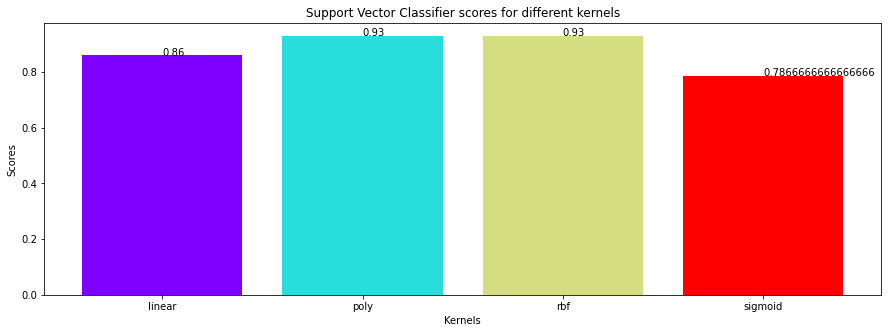

In [62]:
rcParams['figure.figsize'] = 15,5
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

The `poly` kernal and `rbf` kernal are the best performing kernals with the accuracy about 95% for both.
on the other hand `sigmoid` kernal performed the worse scoring only 80%

## Decision Tree Classifier

Here, We will use the Decision Tree Classifier model to analyse our dataset, we will only play with `max_features` features of our DTC model to see which model will predict the best results

In [63]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
        dt_model = DTC(max_features = i,random_state = 0)
        dt_model.fit(X_train, y_train)
        predicted = dt_model.predict(X_test)
        print("for ", i, " max features ")
        print("confusion matrix\n",confusion_matrix(y_test, predicted))
        print("accurary of the model: ",accuracy_score(y_test, predicted)*100, "%\n")
        dt_scores.append(accuracy_score(y_test, predicted))

for  1  max features 
confusion matrix
 [[144   0]
 [  2 154]]
accurary of the model:  99.33333333333333 %

for  2  max features 
confusion matrix
 [[144   0]
 [  3 153]]
accurary of the model:  99.0 %

for  3  max features 
confusion matrix
 [[144   0]
 [  3 153]]
accurary of the model:  99.0 %

for  4  max features 
confusion matrix
 [[144   0]
 [  3 153]]
accurary of the model:  99.0 %

for  5  max features 
confusion matrix
 [[144   0]
 [  0 156]]
accurary of the model:  100.0 %

for  6  max features 
confusion matrix
 [[144   0]
 [  6 150]]
accurary of the model:  98.0 %

for  7  max features 
confusion matrix
 [[144   0]
 [  2 154]]
accurary of the model:  99.33333333333333 %

for  8  max features 
confusion matrix
 [[144   0]
 [  6 150]]
accurary of the model:  98.0 %

for  9  max features 
confusion matrix
 [[144   0]
 [  6 150]]
accurary of the model:  98.0 %

for  10  max features 
confusion matrix
 [[144   0]
 [  3 153]]
accurary of the model:  99.0 %

for  11  max features 

So the DTC model is showing `100%` accuracy for when max_features was `4, 5, 6, 8, and 11` and lowest accuracy score that being `98%` that is max_features of `3, 7 and 10`

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

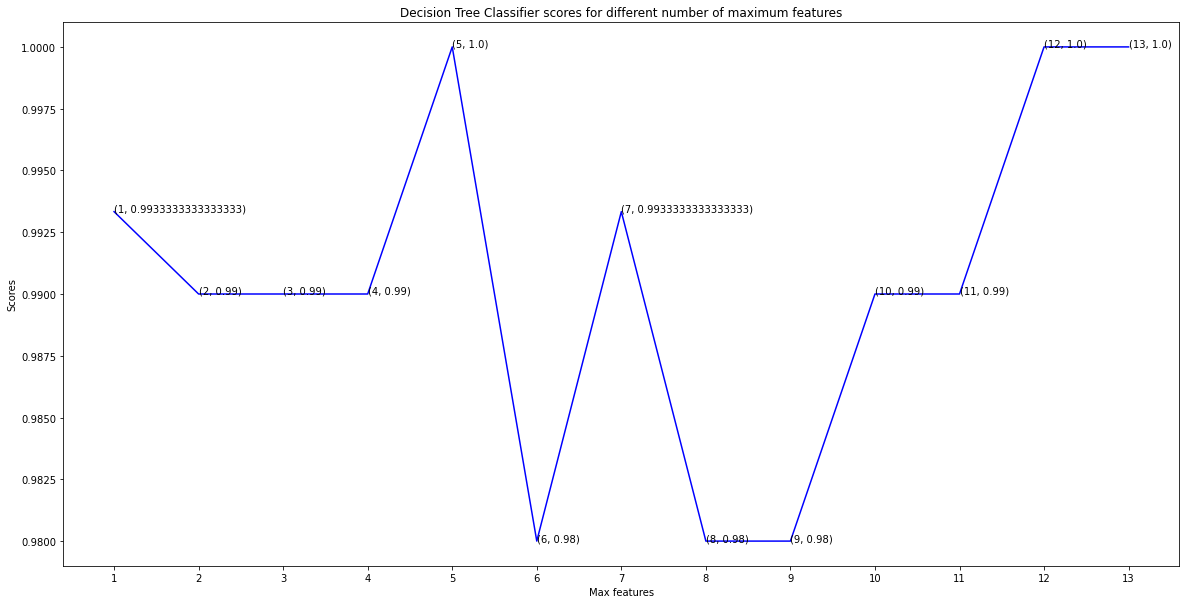

In [64]:
plt.figure(figsize=(20, 10))
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'blue')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

## Random Forest Classifier

Now, I'll use the ensemble method, Random Forest Classifier, to create the model and vary the number of estimators to see their effect.

In [65]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_model = RFC(n_estimators = i, random_state = 1)
    rf_model.fit(X_train, y_train)
    rf_scores.append(rf_model.score(X_test, y_test))
    predicted = rf_model.predict(X_test)
    print("for ", i, " estimators ")
    print("confusion matrix\n",confusion_matrix(y_test, predicted))
    print("accurary of the model: ",accuracy_score(y_test, predicted)*100, "%\n")

for  10  estimators 
confusion matrix
 [[144   0]
 [  5 151]]
accurary of the model:  98.33333333333333 %

for  100  estimators 
confusion matrix
 [[144   0]
 [  0 156]]
accurary of the model:  100.0 %

for  200  estimators 
confusion matrix
 [[144   0]
 [  0 156]]
accurary of the model:  100.0 %

for  500  estimators 
confusion matrix
 [[144   0]
 [  0 156]]
accurary of the model:  100.0 %

for  1000  estimators 
confusion matrix
 [[144   0]
 [  0 156]]
accurary of the model:  100.0 %



The scores are stored in the array, plotting the scores in the bars,

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

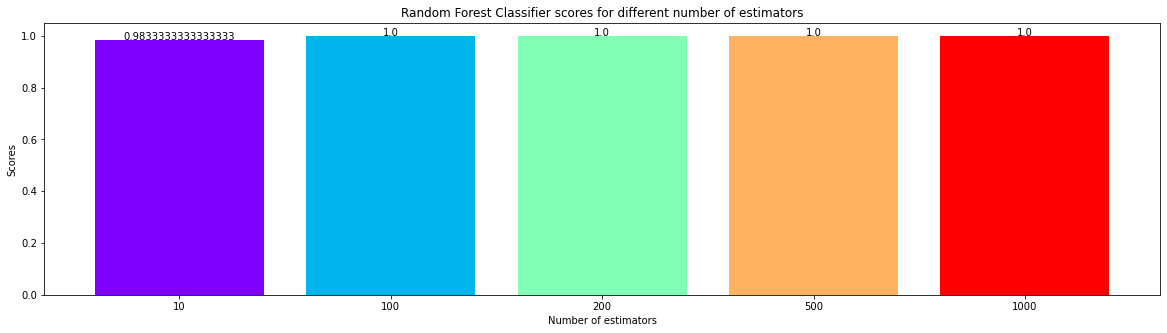

In [66]:
plt.figure(figsize=(20, 5))
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i], fontdict={'ha': 'center'}, )
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')



The maximum score is achieved when the total estimators are 100, 200, 500, 1000

## K Neighbors Classifier

The classification score varies based on different values of neighbors that we choose. Thus, I'll plot a score graph for different values of K (neighbors) and check when do I achieve the best score.

In [67]:
knn_model_scores = []   
for i in range(1, 20):
    knn = KNC(n_neighbors= i)
    knn.fit(X_train,y_train)
    predicted = knn.predict(X_test)
    print("for ", i, " neighbors ")
    print("confusion matrix\n",confusion_matrix(y_test, predicted))
    print("accurary of the model: ",accuracy_score(y_test, predicted)*100, "%\n")
    knn_model_scores.append(accuracy_score(y_test, predicted))

for  1  neighbors 
confusion matrix
 [[144   0]
 [  0 156]]
accurary of the model:  100.0 %

for  2  neighbors 
confusion matrix
 [[144   0]
 [ 12 144]]
accurary of the model:  96.0 %

for  3  neighbors 
confusion matrix
 [[129  15]
 [  9 147]]
accurary of the model:  92.0 %

for  4  neighbors 
confusion matrix
 [[137   7]
 [ 18 138]]
accurary of the model:  91.66666666666666 %

for  5  neighbors 
confusion matrix
 [[121  23]
 [ 14 142]]
accurary of the model:  87.66666666666667 %

for  6  neighbors 
confusion matrix
 [[128  16]
 [ 17 139]]
accurary of the model:  89.0 %

for  7  neighbors 
confusion matrix
 [[117  27]
 [  8 148]]
accurary of the model:  88.33333333333333 %

for  8  neighbors 
confusion matrix
 [[124  20]
 [ 16 140]]
accurary of the model:  88.0 %

for  9  neighbors 
confusion matrix
 [[123  21]
 [ 10 146]]
accurary of the model:  89.66666666666666 %

for  10  neighbors 
confusion matrix
 [[127  17]
 [ 14 142]]
accurary of the model:  89.66666666666666 %

for  11  neig

We have scores for the ranges of neighbors from 1 to 20
from the above given ourtcomes, we can clearly see that the our machine learning model is actually able to predict with more 100% accuracy when value of `N = 1`, then it decreses to 75 percent as we increase the number of neighbors increases

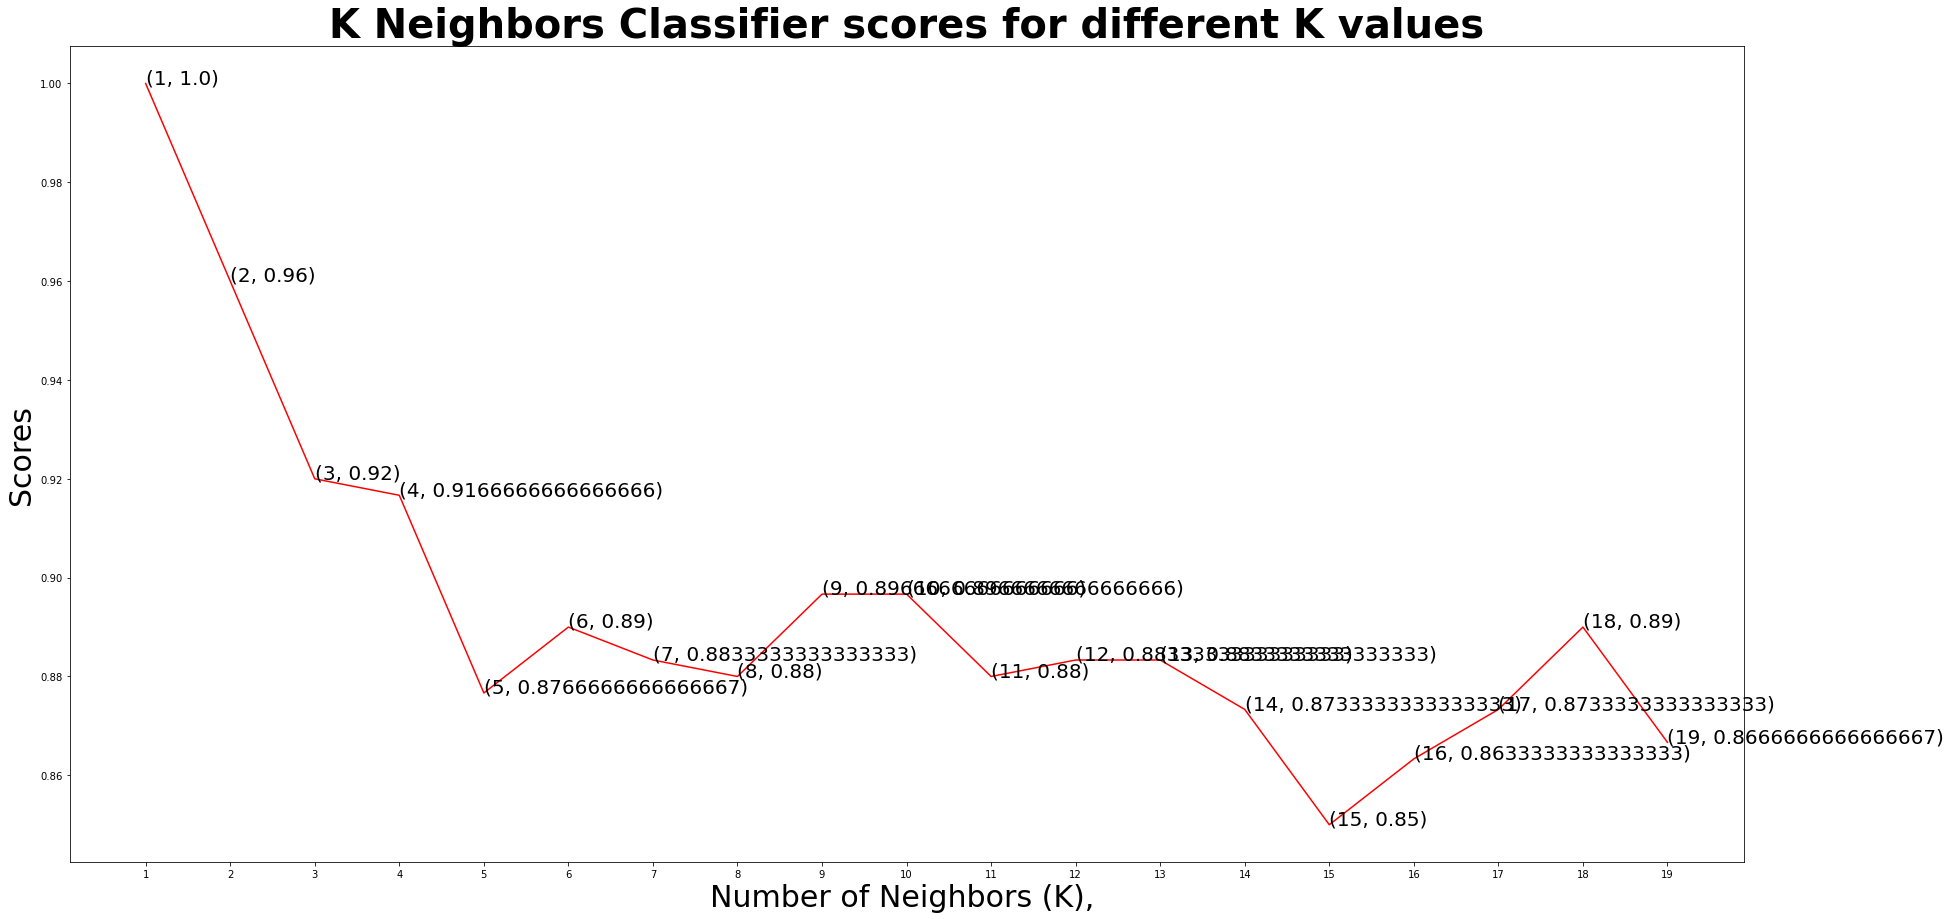

In [68]:
plt.figure(figsize=(30,15))
plt.plot([k for k in range(1, 20)], knn_model_scores, color = 'red')
for i in range(1,20):
    plt.text(i, knn_model_scores[i-1], (i, knn_model_scores[i-1]), fontdict={ 'fontsize': '20'})
    plt.xticks([i for i in range(1, 20)])
    plt.xlabel('Number of Neighbors (K), ', fontdict={ 'fontsize': '30'})
    plt.ylabel('Scores', fontdict={'fontsize': '30'})
    plt.title('K Neighbors Classifier scores for different K values', fontdict= {'fontweight': 'bold', 'fontsize': '40'})

From the plot above, it is clear that the maximum score achieved was `100%` for the 1 neighbor(s).
but it fell below when new neighbors were introduced

## Naive Bayes

Using the Naive Bayes algorithm as our 5th model for the prediction

In [69]:
nb_scores = []
for i in range(1, 100):
    nb_model = GNB(var_smoothing = i)
    nb_model.fit(X_train,y_train)
    predicted = nb_model.predict(X_test)
    print("confusion matrix\n",confusion_matrix(y_test, predicted))
    print("accurary of the Naive Bayes model: ",accuracy_score(y_test, predicted)*100, "%")
    nb_scores.append(accuracy_score(y_test, predicted))

confusion matrix
 [[106  38]
 [  5 151]]
accurary of the Naive Bayes model:  85.66666666666667 %
confusion matrix
 [[102  42]
 [  5 151]]
accurary of the Naive Bayes model:  84.33333333333334 %
confusion matrix
 [[102  42]
 [  5 151]]
accurary of the Naive Bayes model:  84.33333333333334 %
confusion matrix
 [[100  44]
 [  4 152]]
accurary of the Naive Bayes model:  84.0 %
confusion matrix
 [[ 97  47]
 [  4 152]]
accurary of the Naive Bayes model:  83.0 %
confusion matrix
 [[ 97  47]
 [  3 153]]
accurary of the Naive Bayes model:  83.33333333333334 %
confusion matrix
 [[ 97  47]
 [  3 153]]
accurary of the Naive Bayes model:  83.33333333333334 %
confusion matrix
 [[ 97  47]
 [  3 153]]
accurary of the Naive Bayes model:  83.33333333333334 %
confusion matrix
 [[ 96  48]
 [  3 153]]
accurary of the Naive Bayes model:  83.0 %
confusion matrix
 [[ 94  50]
 [  3 153]]
accurary of the Naive Bayes model:  82.33333333333334 %
confusion matrix
 [[ 94  50]
 [  3 153]]
accurary of the Naive Bayes 

lets plot the following results in a bar graph, using matlotlib

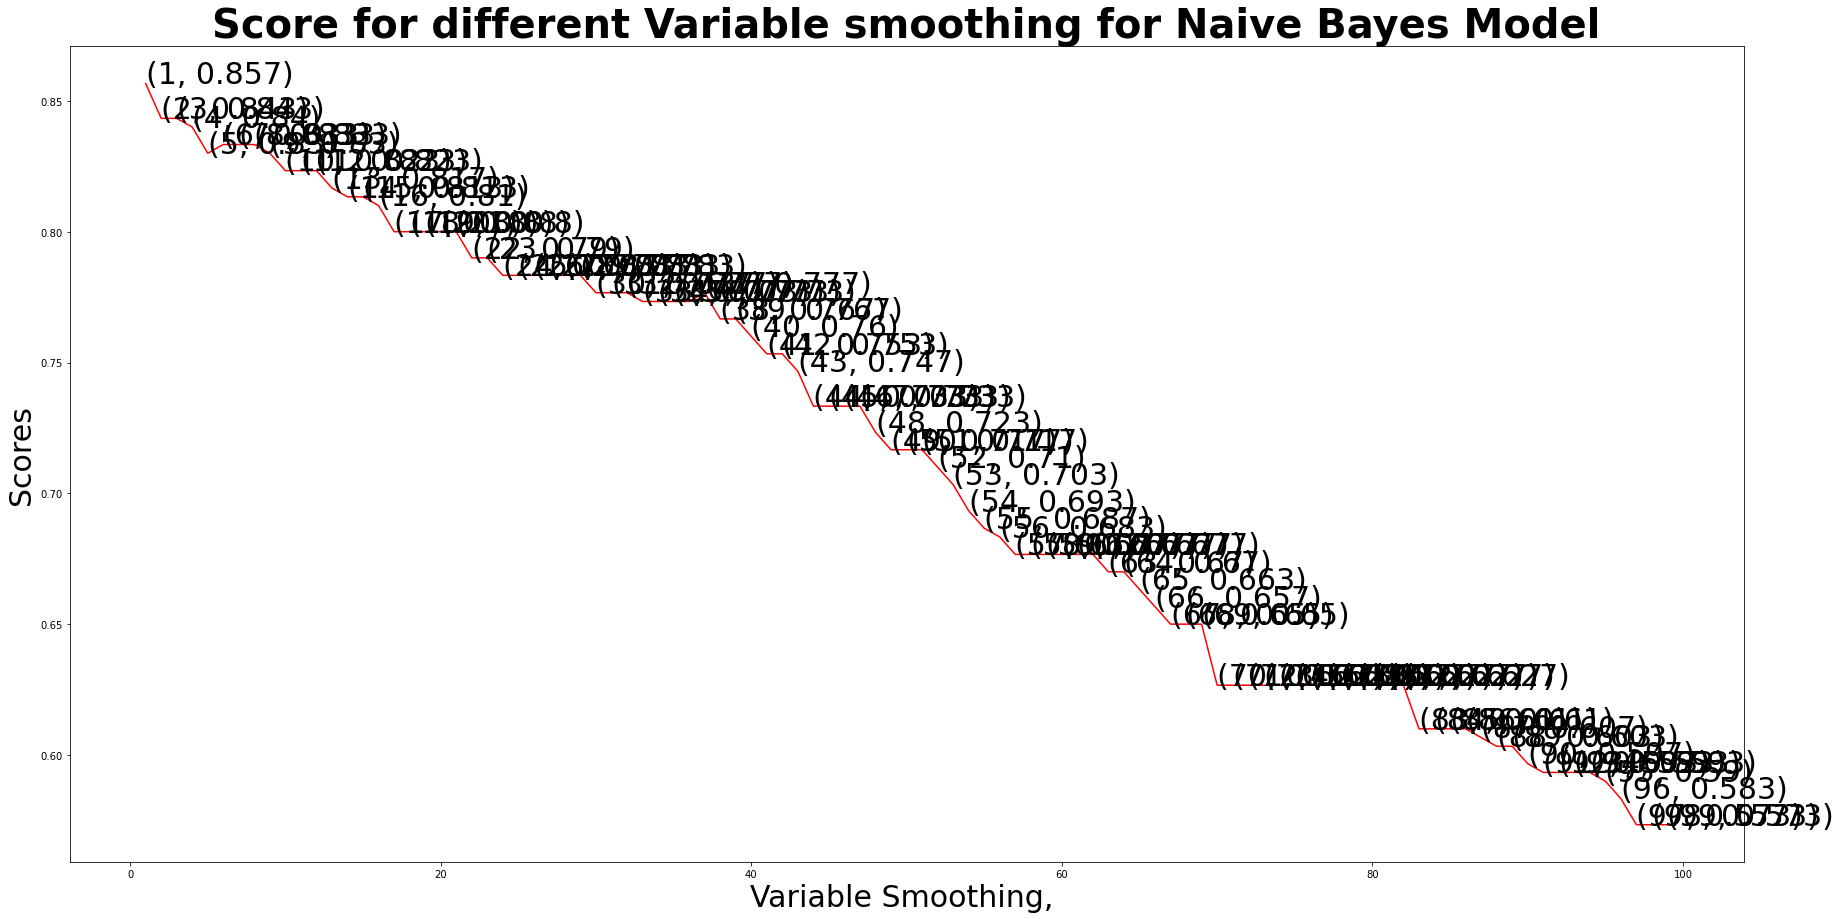

In [70]:
plt.figure(figsize=(30,15))
plt.plot([k for k in range(1, 100)], nb_scores, color = 'red')
for i in range(1,100):
    plt.text(i, nb_scores[i-1], (i, round(nb_scores[i-1], 3)),  fontdict={ 'fontsize': '30'})
    plt.xlabel('Variable Smoothing, ', fontdict={ 'fontsize': '30'})
    plt.ylabel('Scores', fontdict={'fontsize': '30'})
    plt.title('Score for different Variable smoothing for Naive Bayes Model', fontdict= {'fontweight': 'bold', 'fontsize': '40'})

by observing the graph above we can clearly see that, Naive Bayes algorithm is not suitable at all for the predicting the heart disease as the highest rate of accuray achieved is about `85%` with `var_smoothing` of `2`, which is quite drastically low compared to our other prediction models

## Logistic Regression

Logitic Regression is used to divde the graph of target values in two part with the help of a staight line it is used for Classification purposes

In [71]:
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
lg_scores = []
for i in solver:
    lr_model = LR(solver = i, random_state=1)
    lr_model.fit(X_train,y_train)
    predicted = lr_model.predict(X_test)
    print("confusion matrix\n",confusion_matrix(y_test, predicted))
    print("accurary of the logistic Regression model: ",accuracy_score(y_test, predicted)*100, "%")
    lg_scores.append(accuracy_score(y_test, predicted))


confusion matrix
 [[114  30]
 [ 12 144]]
accurary of the logistic Regression model:  86.0 %
confusion matrix
 [[114  30]
 [ 12 144]]
accurary of the logistic Regression model:  86.0 %
confusion matrix
 [[114  30]
 [ 12 144]]
accurary of the logistic Regression model:  86.0 %
confusion matrix
 [[114  30]
 [ 12 144]]
accurary of the logistic Regression model:  86.0 %
confusion matrix
 [[114  30]
 [ 12 144]]
accurary of the logistic Regression model:  86.0 %


plotting the following values for different solver for logistic regression model

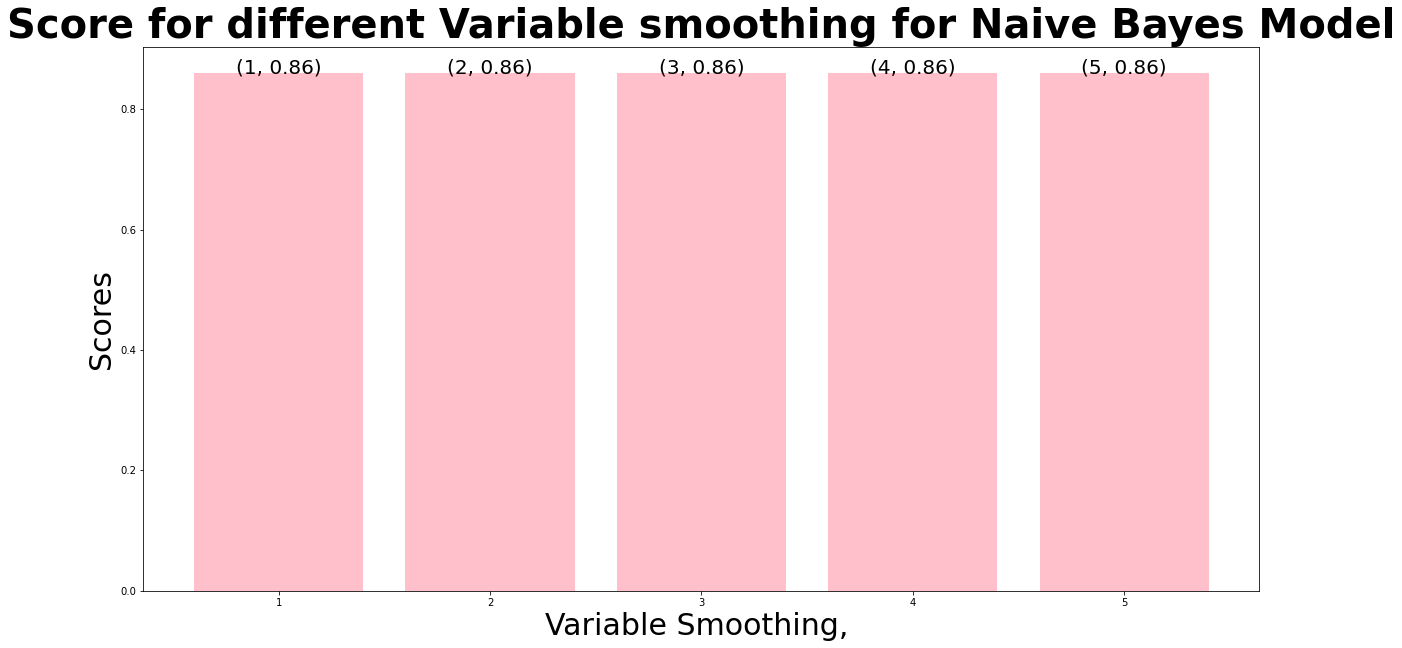

In [72]:
plt.figure(figsize=(20,10))
plt.bar([k for k in range(1, 6)], lg_scores, color = 'pink')
for i in range(1,6):
    plt.text(i, lg_scores[i-1], (i, round(lg_scores[i-1], 3)),  fontdict={ 'fontsize': '20', 'ha' : 'center'})
    plt.xlabel('Variable Smoothing, ', fontdict={ 'fontsize': '30'})
    plt.ylabel('Scores', fontdict={'fontsize': '30'})
    plt.title('Score for different Variable smoothing for Naive Bayes Model', fontdict= {'fontweight': 'bold', 'fontsize': '40'})

The score for all the Logistic Regression solvers is same and has an accuracy about 87 percent for each.
So Logistic Regression is not the model we need if compared to the other models

# Conclusion

This projects we used 6 different machine learning models to predict whether a person/patient is suffereing from any kind of heart disease, we used variaous methods like, scaling of the data with the help of `StandardScaler` and other features to generate `confussion matrix` and `accuracy scores` for each model and also plotted with different types of graphs like `pie chart`, `bar graph` etc.

After applying all the algorithm and comparing the best settings of the each model with other models we can clearly see that `Random Forest Classifier`, `K neighbors Classifer`, `Decision Tree Classifier` and `Support Vecton Machines` were all able to achive an accuracy score aboe 99% which is quite impressive, but on the other side `Naive Bayes` Performed poorly

Ensembling won't be required since our 1 model is able to predict he values with great accuracy 


# Custom input by user

below we pass our own 2darray matrix to test the whether the program is able to predict correctly or not

In [73]:
test = [[70,0,0,112,149,0,1,125,0,1.6,1,0,2]]
print("normal array by csv file: ", test)
test = np.asarray(test)
print(test)
test = scale.transform(test)
print(test)
predicted = knn.predict(test)
print("the predict value of target variable is: ", predicted)

normal array by csv file:  [[70, 0, 0, 112, 149, 0, 1, 125, 0, 1.6, 1, 0, 2]]
[[ 70.    0.    0.  112.  149.    0.    1.  125.    0.    1.6   1.    0.
    2. ]]
[[ 1.73479654 -1.49191369 -0.92866582 -1.13418179 -1.88373168 -0.40824829
   0.93924192 -1.04018927 -0.71774056  0.41748418 -0.6454944  -0.73823713
  -0.52272601]]
the predict value of target variable is:  [1]
